---
title: cheg304 homework4 question4
author: udid 702687390
date: today
format:
    html:
        self-contained: true
        code-fold: show
---

In [99]:
import numpy as np
from scipy.stats import norm, poisson, binom
import matplotlib.pyplot as plt

1. The histogram of the binomial distribution for $n=15$ and $p=0.4$
2. The histogram of the Poisson distribution for the appropriate equivalent $\lambda = np$
3. The continuous plot of the normal distribution for the appropriate equivalent mean and standard deviation ( $\mu = \text{mean}; \sigma = \sqrt{npq}$ )

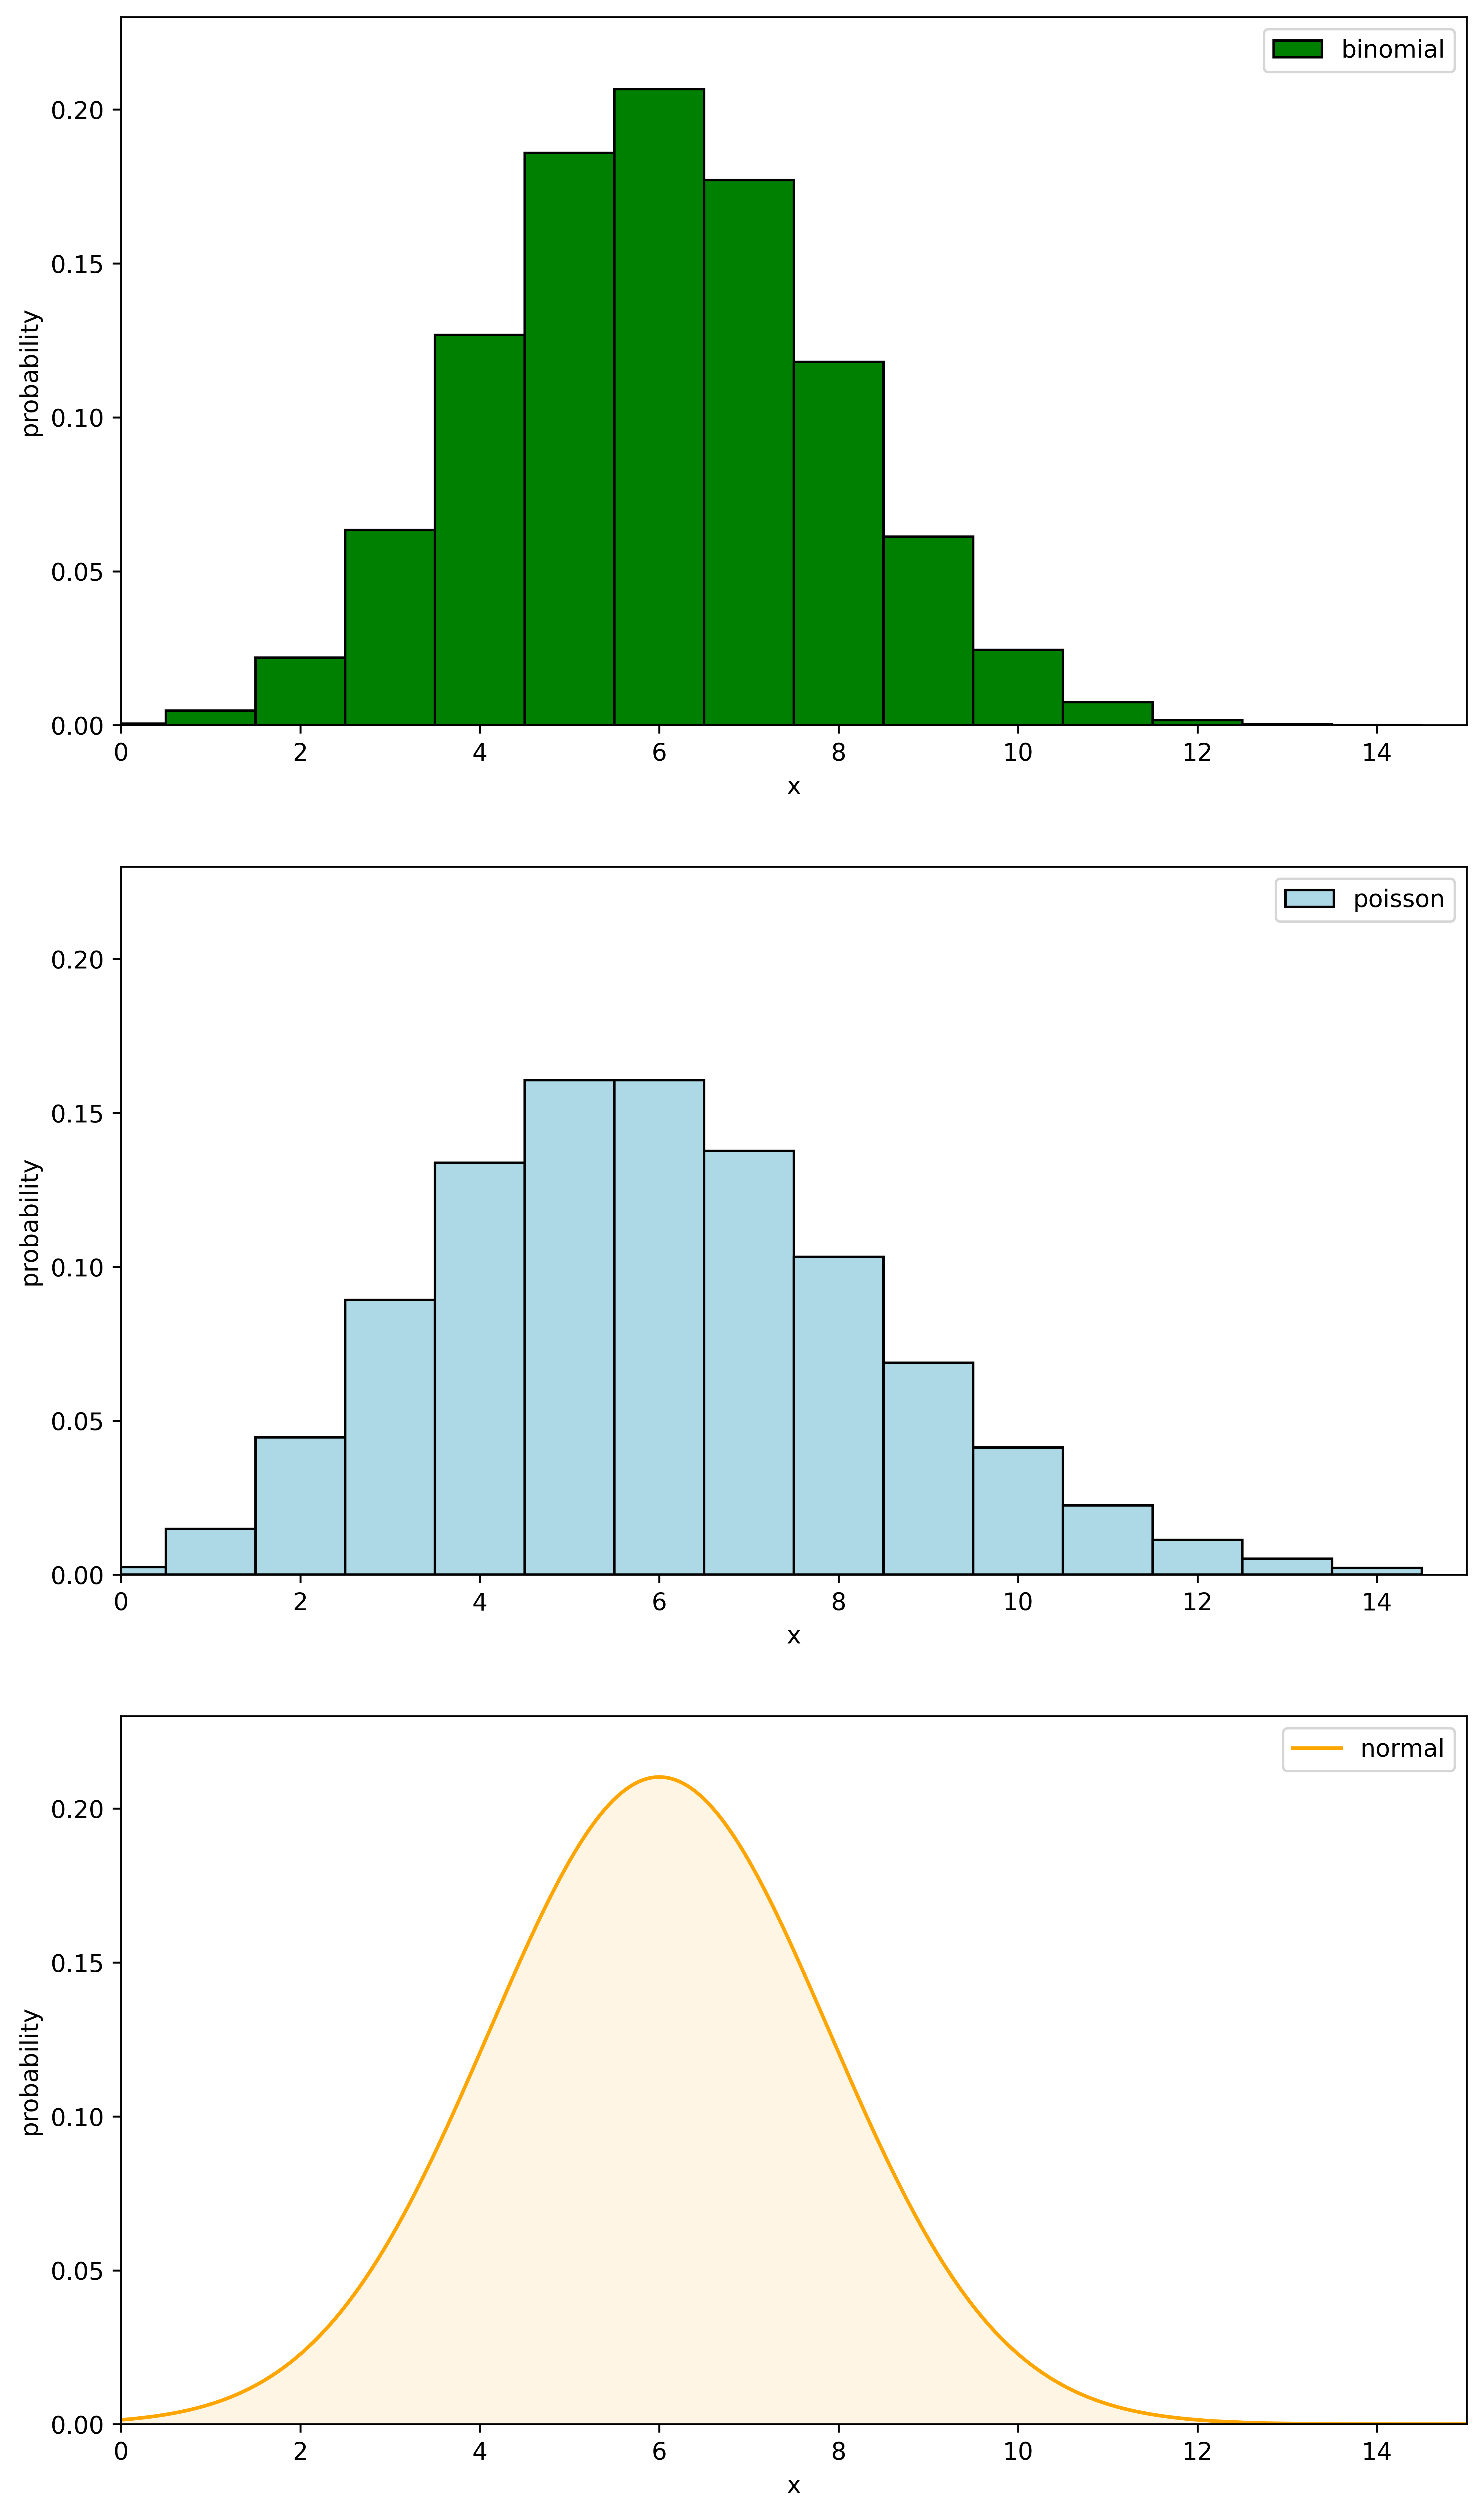

In [102]:
fig, (ax_binom, ax_poisson, ax_normal) = plt.subplots(3,1, figsize=(10,18), dpi=600, subplot_kw={'xlabel':"x", 'ylabel':"probability", 'xlim':(0,15), 'ylim':(0,0.23)})

n = 15
p = 0.4
x = np.arange(0,15)
x_continuous = np.linspace(0,15,1000)

ax_binom.bar(x, binom.pmf(x, n=n, p=p), width=1, edgecolor='black', facecolor='green')
ax_poisson.bar(x, poisson.pmf(x, n*p), width=1, edgecolor='black', facecolor='lightblue')
ax_normal.plot(x_continuous, norm.pdf(x_continuous, n*p, np.sqrt(n*p*(1-p))), c='orange')
ax_normal.fill_between(x_continuous, norm.pdf(x_continuous, n*p, np.sqrt(n*p*(1-p))), color='orange', alpha=0.1)

ax_binom.legend(['binomial'])
ax_poisson.legend(['poisson'])
ax_normal.legend(['normal']);

### monte carlo

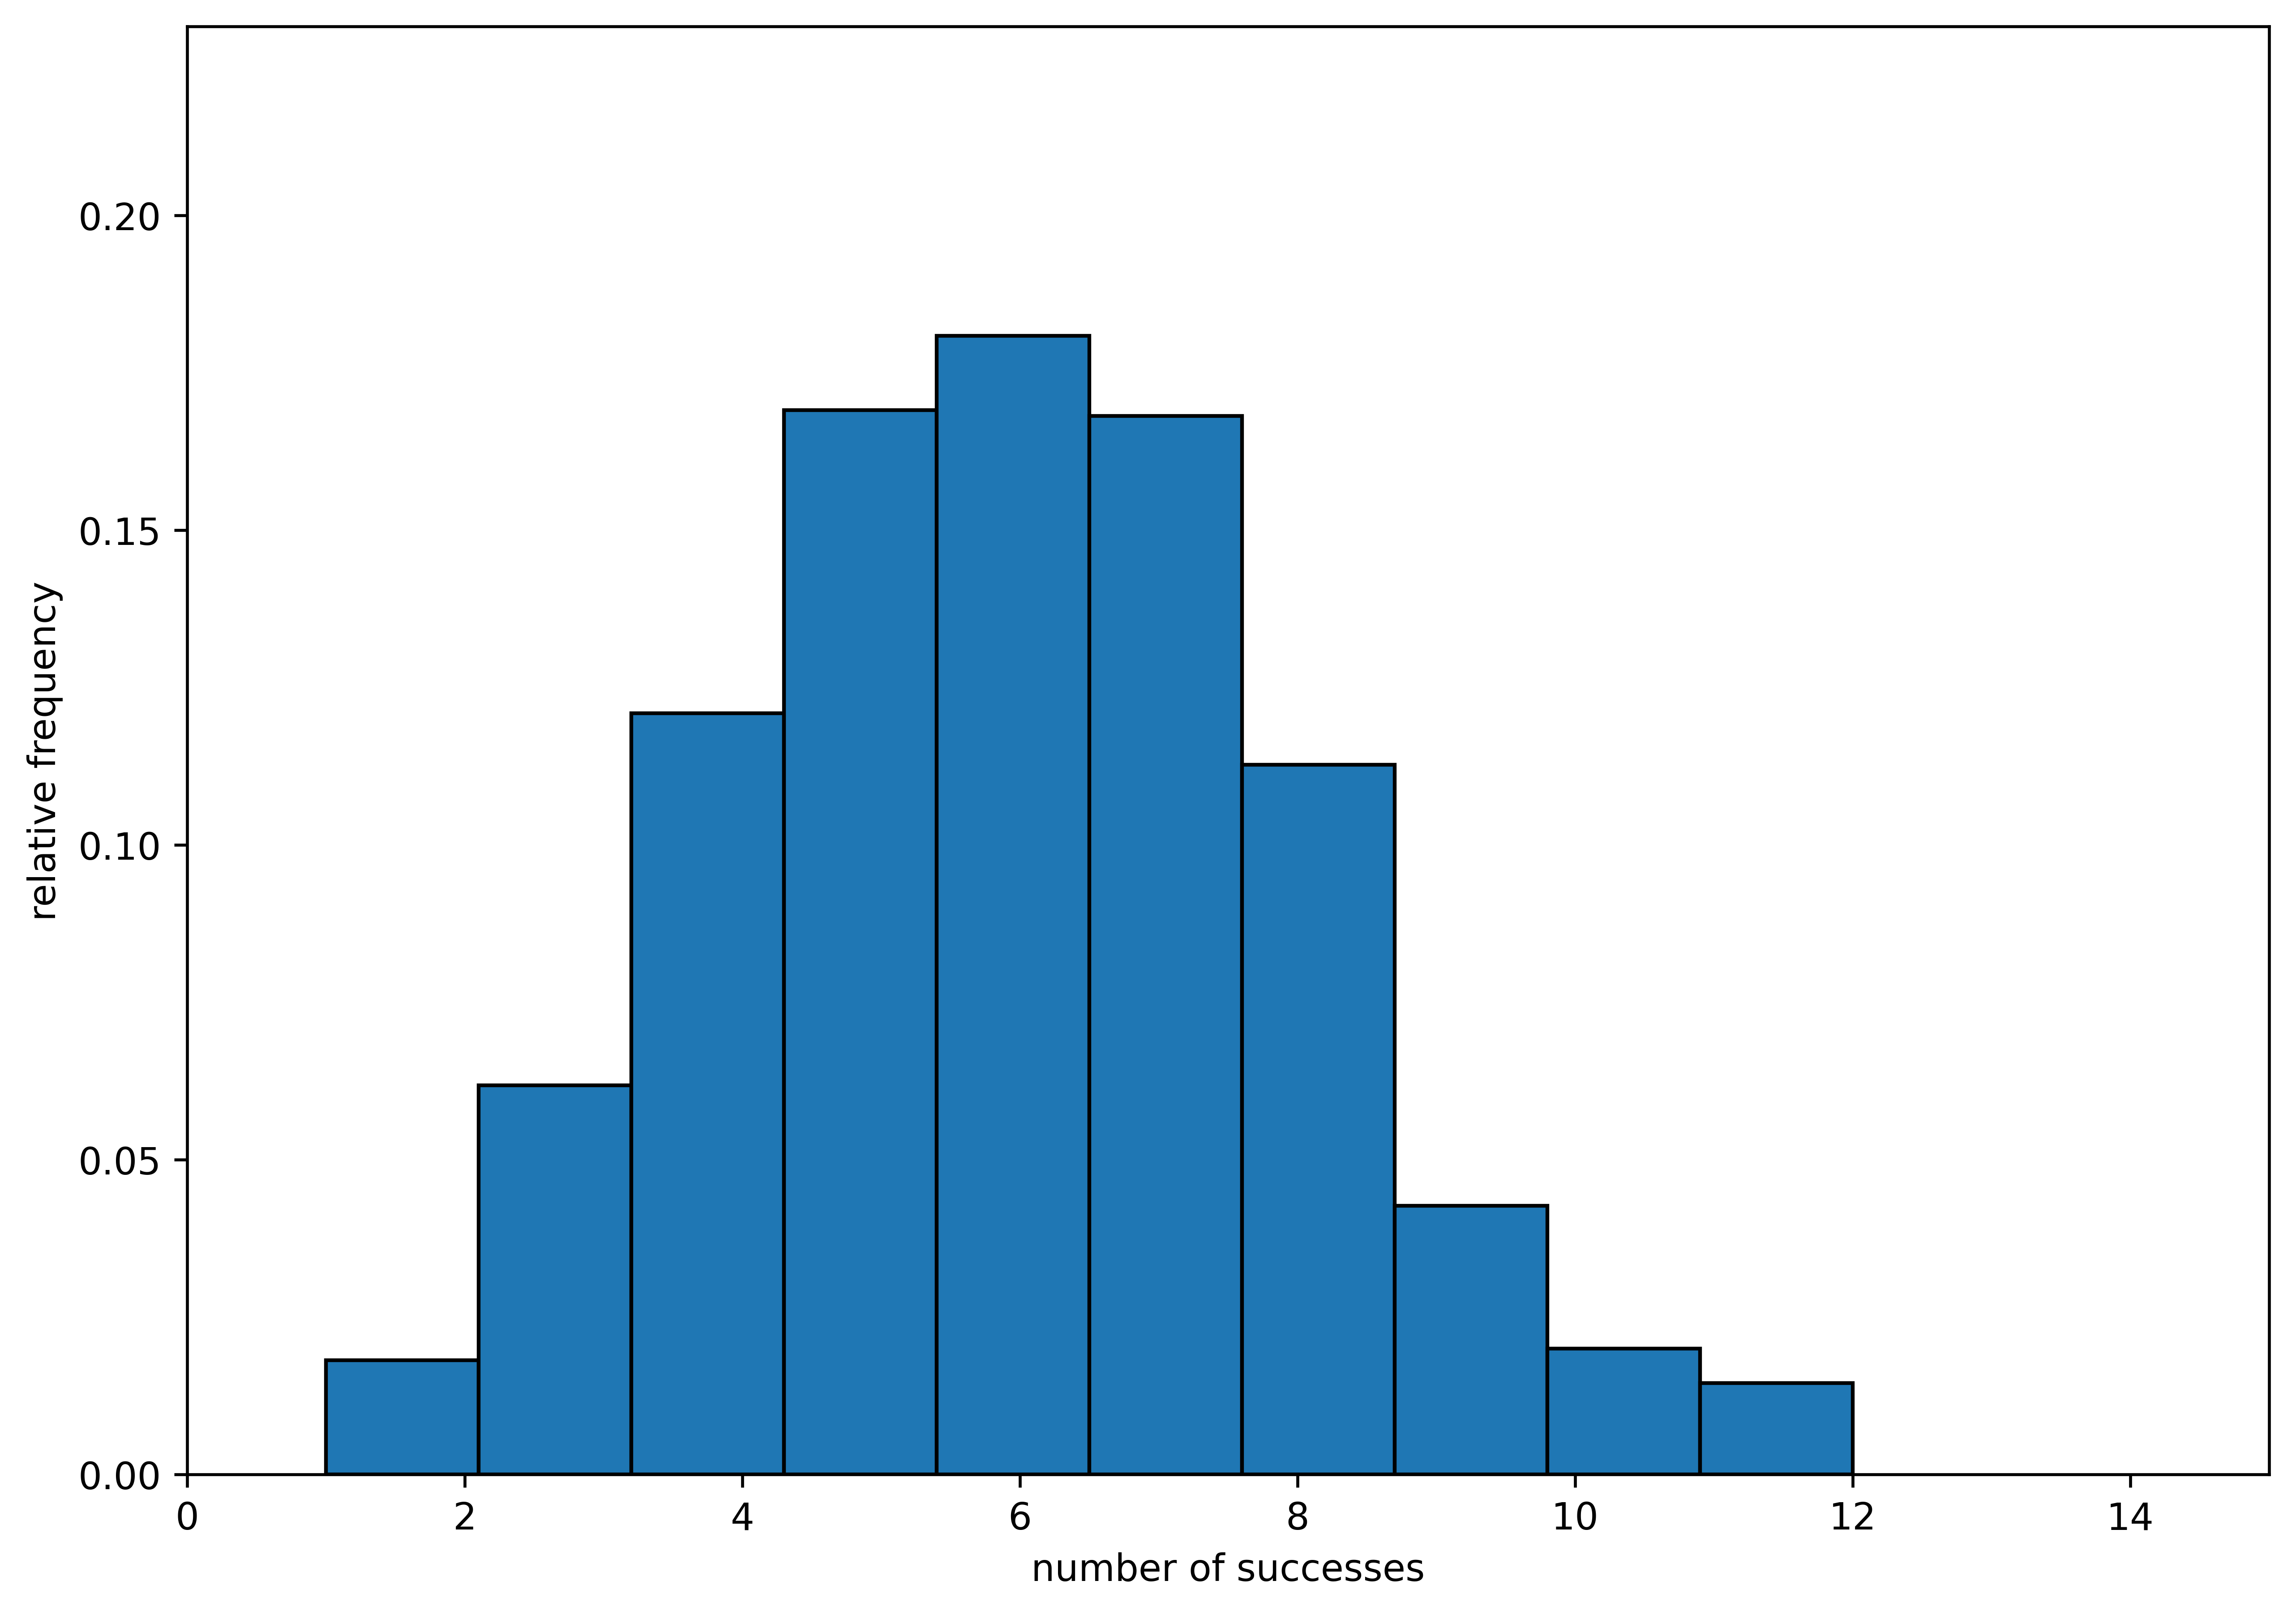

In [105]:
def monte_carlo(p, size):
    return sum(np.random.rand(size) < p)

def batch_monte_carlo(p, size, batch_size):
    results = [monte_carlo(p, size) for i in range(batch_size)]
    return np.array(results)

simulated = batch_monte_carlo(0.4, 15, 1000)
fig,ax = plt.subplots(figsize=(10,7), dpi=600)
ax.hist(simulated, density=True, edgecolor='black');
ax.set(xlim=(0,15), ylabel='relative frequency', xlabel='number of successes', ylim=(0,0.23));

In [106]:
# filler text